### **0. Setup**

In [129]:
import os, glob, warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family': 'Arial', 'size': 15}
mpl.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
my_pal = ['mediumseagreen', 'dodgerblue']
# my_pal = ['grey', 'mediumseagreen', 'mediumblue', 'darkorange']

# set the directory where the data files are waiting
directory = '/Users/ShokenLEE/Desktop/DATA/2022 1-3/3-24-22 P-197 2xT DGAT1 OE/'

### **1. Concanatate all the CSV files**

In [121]:
df = pd.DataFrame()

for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('csv'):
            _df = pd.read_csv(os.path.join(root, file))
            df = pd.concat([df, _df], axis=0)
            
# for file in os.listdir(directory):
#     if file.endswith('csv'):
#         _df = pd.read_csv(os.path.join(root, file))
#         df = pd.concat([df, _df], axis=0)            

In [122]:
df.head()
# df.tail()

,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio
0,1,3-24-22 U2OS2xT#1 Flg-DGAT1 HA mScrt0.5 488mNG...,382.258,227.582,495.329,2.176
1,2,3-24-22 U2OS2xT#1 Flg-DGAT1 HA mScrt0.5 488mNG...,305.644,135.479,492.474,3.635
2,3,3-24-22 U2OS2xT#1 Flg-DGAT1 HA mScrt0.5 488mNG...,195.641,58.283,208.873,3.584
3,4,3-24-22 U2OS2xT#1 Flg-DGAT1 HA mScrt0.5 488mNG...,415.775,218.726,718.224,3.284
4,5,3-24-22 U2OS2xT#1 Flg-DGAT1 HA mScrt0.5 488mNG...,289.970,122.802,469.088,3.820


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 7
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   75 non-null     int64  
 1   FileName        75 non-null     object 
 2   Mean_whole      75 non-null     float64
 3   Mean_internal   75 non-null     float64
 4   Mean_periphery  75 non-null     float64
 5   Ratio           75 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.1+ KB


### **2. Add columns**

####  **siRNA**

In [98]:
df.loc[df['FileName'].str.contains('siCtrl'), 'siRNA'] = 'siCtrl'
df.loc[df['FileName'].str.contains('CTDNEP1'), 'siRNA'] = 'siCTDNEP1'
df.loc[df['FileName'].str.contains('Lpin1'), 'siRNA'] = 'siLpin1'
df.loc[df['FileName'].str.contains('NEP1R1'), 'siRNA'] = 'siNEP1R1'

####  **Constructs**

In [124]:
df.loc[df['FileName'].str.contains('WT'), 'siRNA'] = 'WT'
df.loc[df['FileName'].str.contains('HA'), 'siRNA'] = 'HA'
df.loc[df['FileName'].str.contains('Lpin1'), 'siRNA'] = 'siLpin1'
df.loc[df['FileName'].str.contains('NEP1R1'), 'siRNA'] = 'siNEP1R1'

### **3. Cleaning**

####  **Drop zero value rows**

In [125]:
df_not_zero = df[df['Mean_whole'] !=0]

In [126]:
df_not_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   69 non-null     int64  
 1   FileName        69 non-null     object 
 2   Mean_whole      69 non-null     float64
 3   Mean_internal   69 non-null     float64
 4   Mean_periphery  69 non-null     float64
 5   Ratio           69 non-null     float64
 6   siRNA           69 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 4.3+ KB


### **4. Analysis**

#### **4-0. Quick check**

In [132]:
df_not_zero.groupby(['siRNA']).count()

,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio
siRNA,,,,,,
HA,33,33,33,33,33,33
WT,36,36,36,36,36,36


Text(0.5, 1.0, 'Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

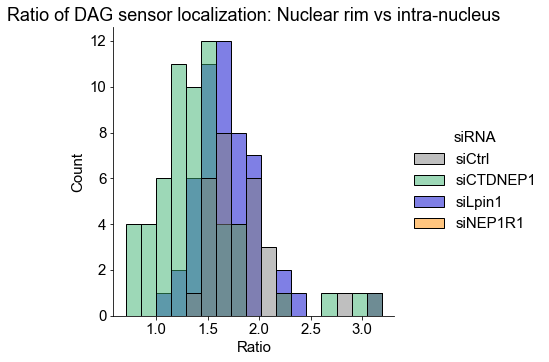

In [102]:
hist = sns.displot(data=df_not_zero, x='Ratio', hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

#### **4-1. Check cell counts per sample**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

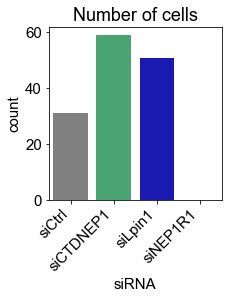

In [103]:
fig_width, fig_height = 3.0, 3.0
fig = plt.figure(figsize=(fig_width,fig_height))
# fig = plt.figure()
ax_count = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_count = sns.countplot(data=df_not_zero, x='siRNA', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of cells')
ax_count.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [104]:
df.groupby(['siRNA']).size()

siRNA
siCTDNEP1    62
siCtrl       32
siLpin1      53
dtype: int64

#### **4-2. Ratio of DAG sensor localization: rim vs inside nucleus**

[Text(0, 0, 'WT'), Text(1, 0, 'HA')]

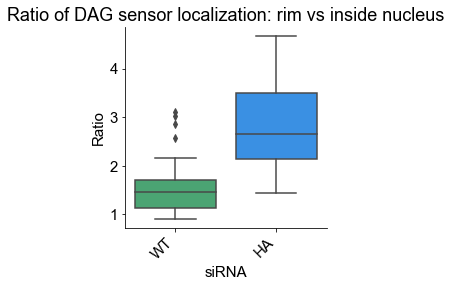

In [130]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siLpin1'], palette=my_pal)
ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Ratio', order=['WT', 'HA'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['WT', 'HA'], rotation=45, ha='right')

In [131]:
fig.savefig(directory + '/Ratio_box.pdf', bbox_inches='tight', transparent=True)

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

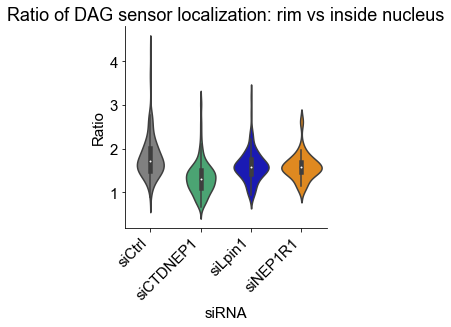

In [56]:
fig = plt.figure(figsize=(3.5,3.5))
ax_vio = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_vio = sns.violinplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_vio.spines['top'].set_visible(False)
ax_vio.spines['right'].set_visible(False)
ax_vio.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [20]:
fig.savefig(directory + '/Ratio_violin.jpg', bbox_inches='tight')

#### **4-3. Overall mean intensity in nucleus**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

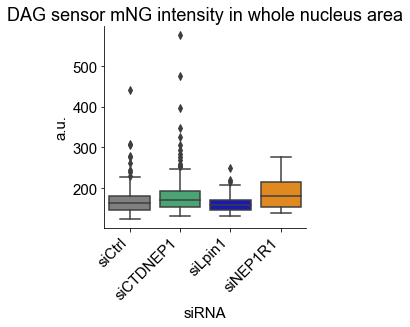

In [57]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Mean_whole', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('DAG sensor mNG intensity in whole nucleus area')
plt.ylabel('a.u.')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [23]:
fig.savefig(directory + '/Mean_whole.jpg', bbox_inches='tight')

#### **4-4. Correlation b/w whole mean intensity and ratio values**

#### Limited to those with mean_whole less than 300

(124.653, 300.0)

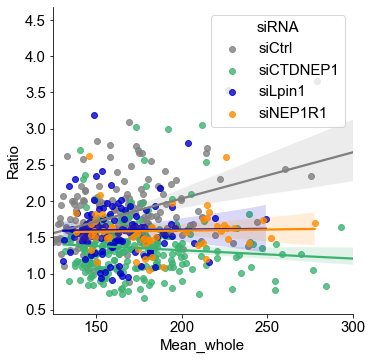

In [75]:
scatter = sns.lmplot(x='Mean_whole', y='Ratio', data=df_not_zero, 
                     hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], 
                     palette=my_pal, legend_out=False)
min = np.min(df_not_zero['Mean_whole'])
plt.xlim([min,300])

In [25]:
scatter.savefig(directory + '/Mean_vs_Ratio_scatter.jpg', bbox_inches='tight')

#### **4-5. Tukey test**

In [108]:
res = pairwise_tukeyhsd(df['Ratio'], df['siRNA'], alpha=0.05)

In [109]:
print(res)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1   group2 meandiff p-adj   lower  upper  reject
-------------------------------------------------------
siCTDNEP1  siCtrl   0.4442  0.001  0.1853  0.703   True
siCTDNEP1 siLpin1   0.2817 0.0089  0.0592 0.5042   True
   siCtrl siLpin1  -0.1625  0.321 -0.4287 0.1038  False
-------------------------------------------------------
